# ANL252 - Python for Data Analytics

## Data Cleaning & Processing
In this section, the data will be cleaned and processed to be used for the data study.

In [1]:
# importing libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("TMA_Data.csv")

In [3]:
df.sample(5, random_state=999)

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
173,174,Neelam Clarkson,03/16/81,F,Married,PR,No,1/9/2012,NaN,Manufacturing,58530,Meet,5.00,5,19
73,74,Evie-May Mcneill,10/9/1974,F,Married,Citizen,No,8/19/2013,NaN,Manufacturing,49256,Meet,4.10,5,3
226,227,Susannah Sumner,1/7/1987,F,Married,Non-Resident,No,1/7/2013,NaN,Manufacturing,62810,Meet,3.93,3,20
20,21,Antonina Needham,09/22/89,F,Single,Citizen,No,2/16/2015,NaN,Sales,61555,Meet,4.50,5,20
218,219,Simeon Gentry,10/31/77,M,Married,Citizen,No,5/16/2011,6/8/2016,Manufacturing,55722,Meet,5.00,4,14


In [4]:
df['LeftDate'].fillna('1/5/2022', inplace=True)

In [5]:
df['BirthYear'] = pd.to_datetime(df['BirthYear'])
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['LeftDate'] = pd.to_datetime(df['LeftDate'])

In [6]:
df.sample(5, random_state=999)

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
173,174,Neelam Clarkson,1981-03-16,F,Married,PR,No,2012-01-09,2022-01-05,Manufacturing,58530,Meet,5.00,5,19
73,74,Evie-May Mcneill,1974-10-09,F,Married,Citizen,No,2013-08-19,2022-01-05,Manufacturing,49256,Meet,4.10,5,3
226,227,Susannah Sumner,1987-01-07,F,Married,Non-Resident,No,2013-01-07,2022-01-05,Manufacturing,62810,Meet,3.93,3,20
20,21,Antonina Needham,1989-09-22,F,Single,Citizen,No,2015-02-16,2022-01-05,Sales,61555,Meet,4.50,5,20
218,219,Simeon Gentry,1977-10-31,M,Married,Citizen,No,2011-05-16,2016-06-08,Manufacturing,55722,Meet,5.00,4,14


## 1b) Data Exploration and Visualisation

The dataset is now considered to be cleaned and we are ready to start visualising and exploring the features.

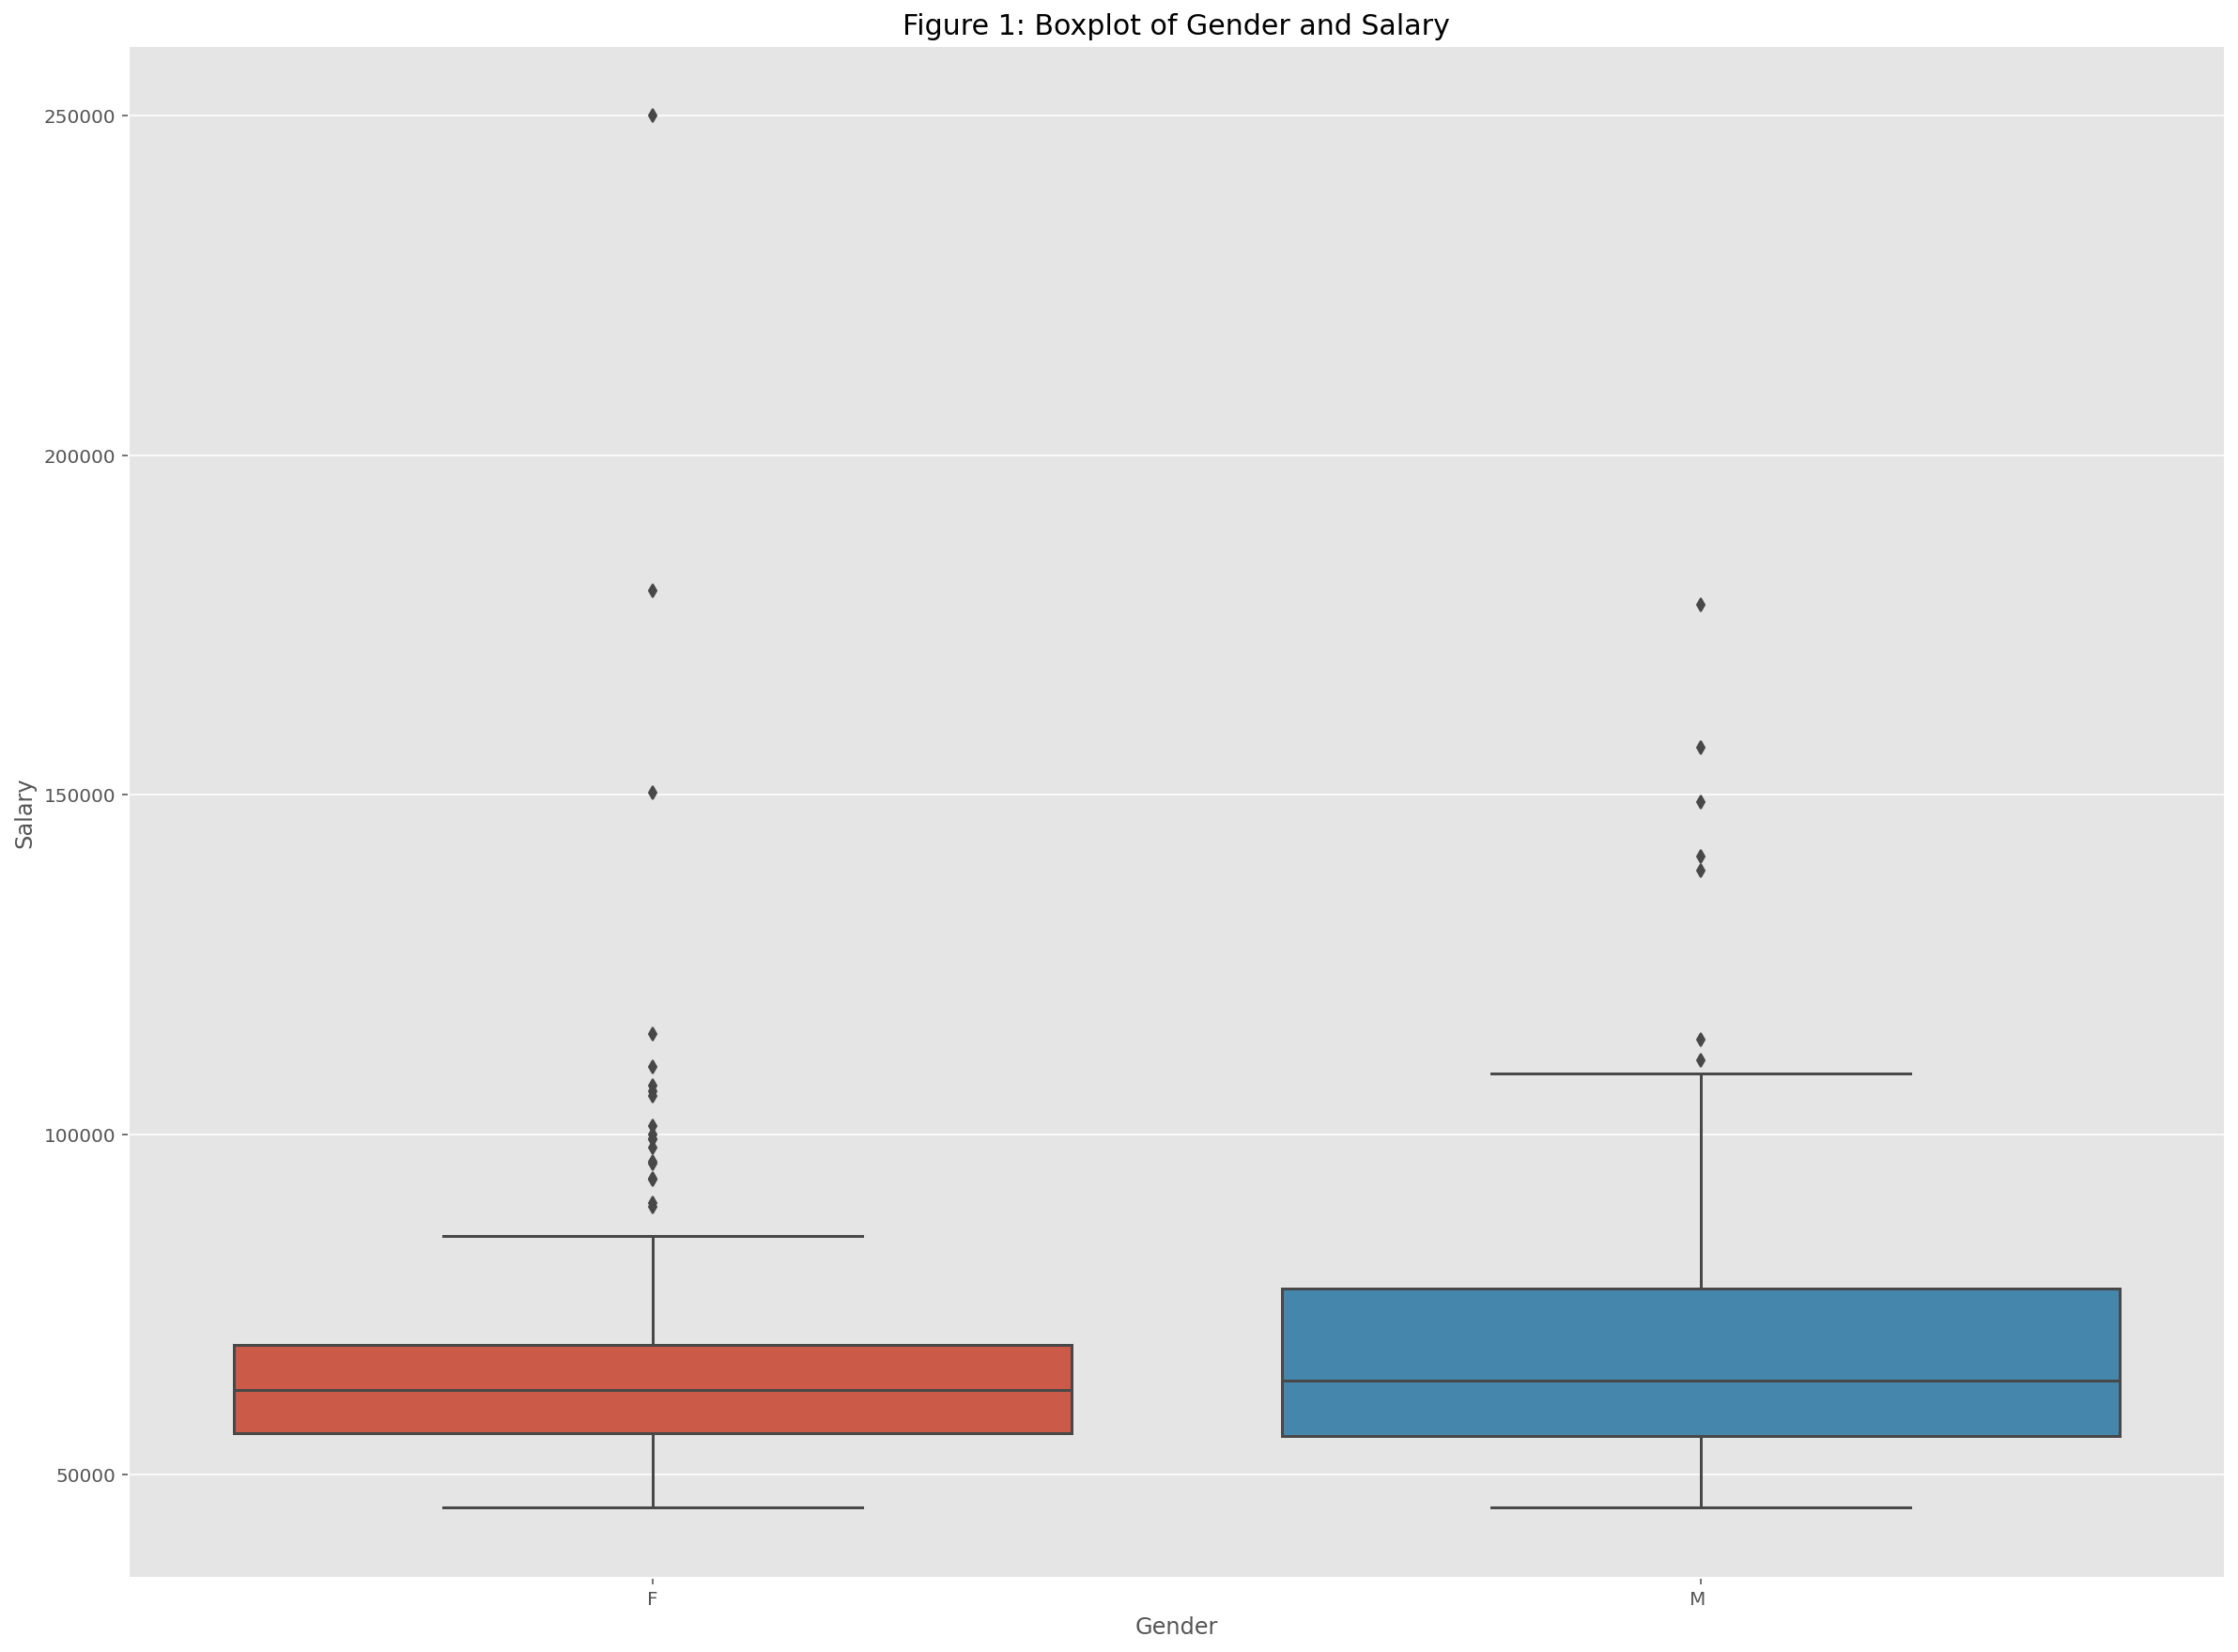

In [7]:
plt.figure(figsize = (20,15))
sns.boxplot(df['Gender'], df['Salary']);
plt.title('Figure 1: Boxplot of Gender and Salary', fontsize = 15)
plt.show();

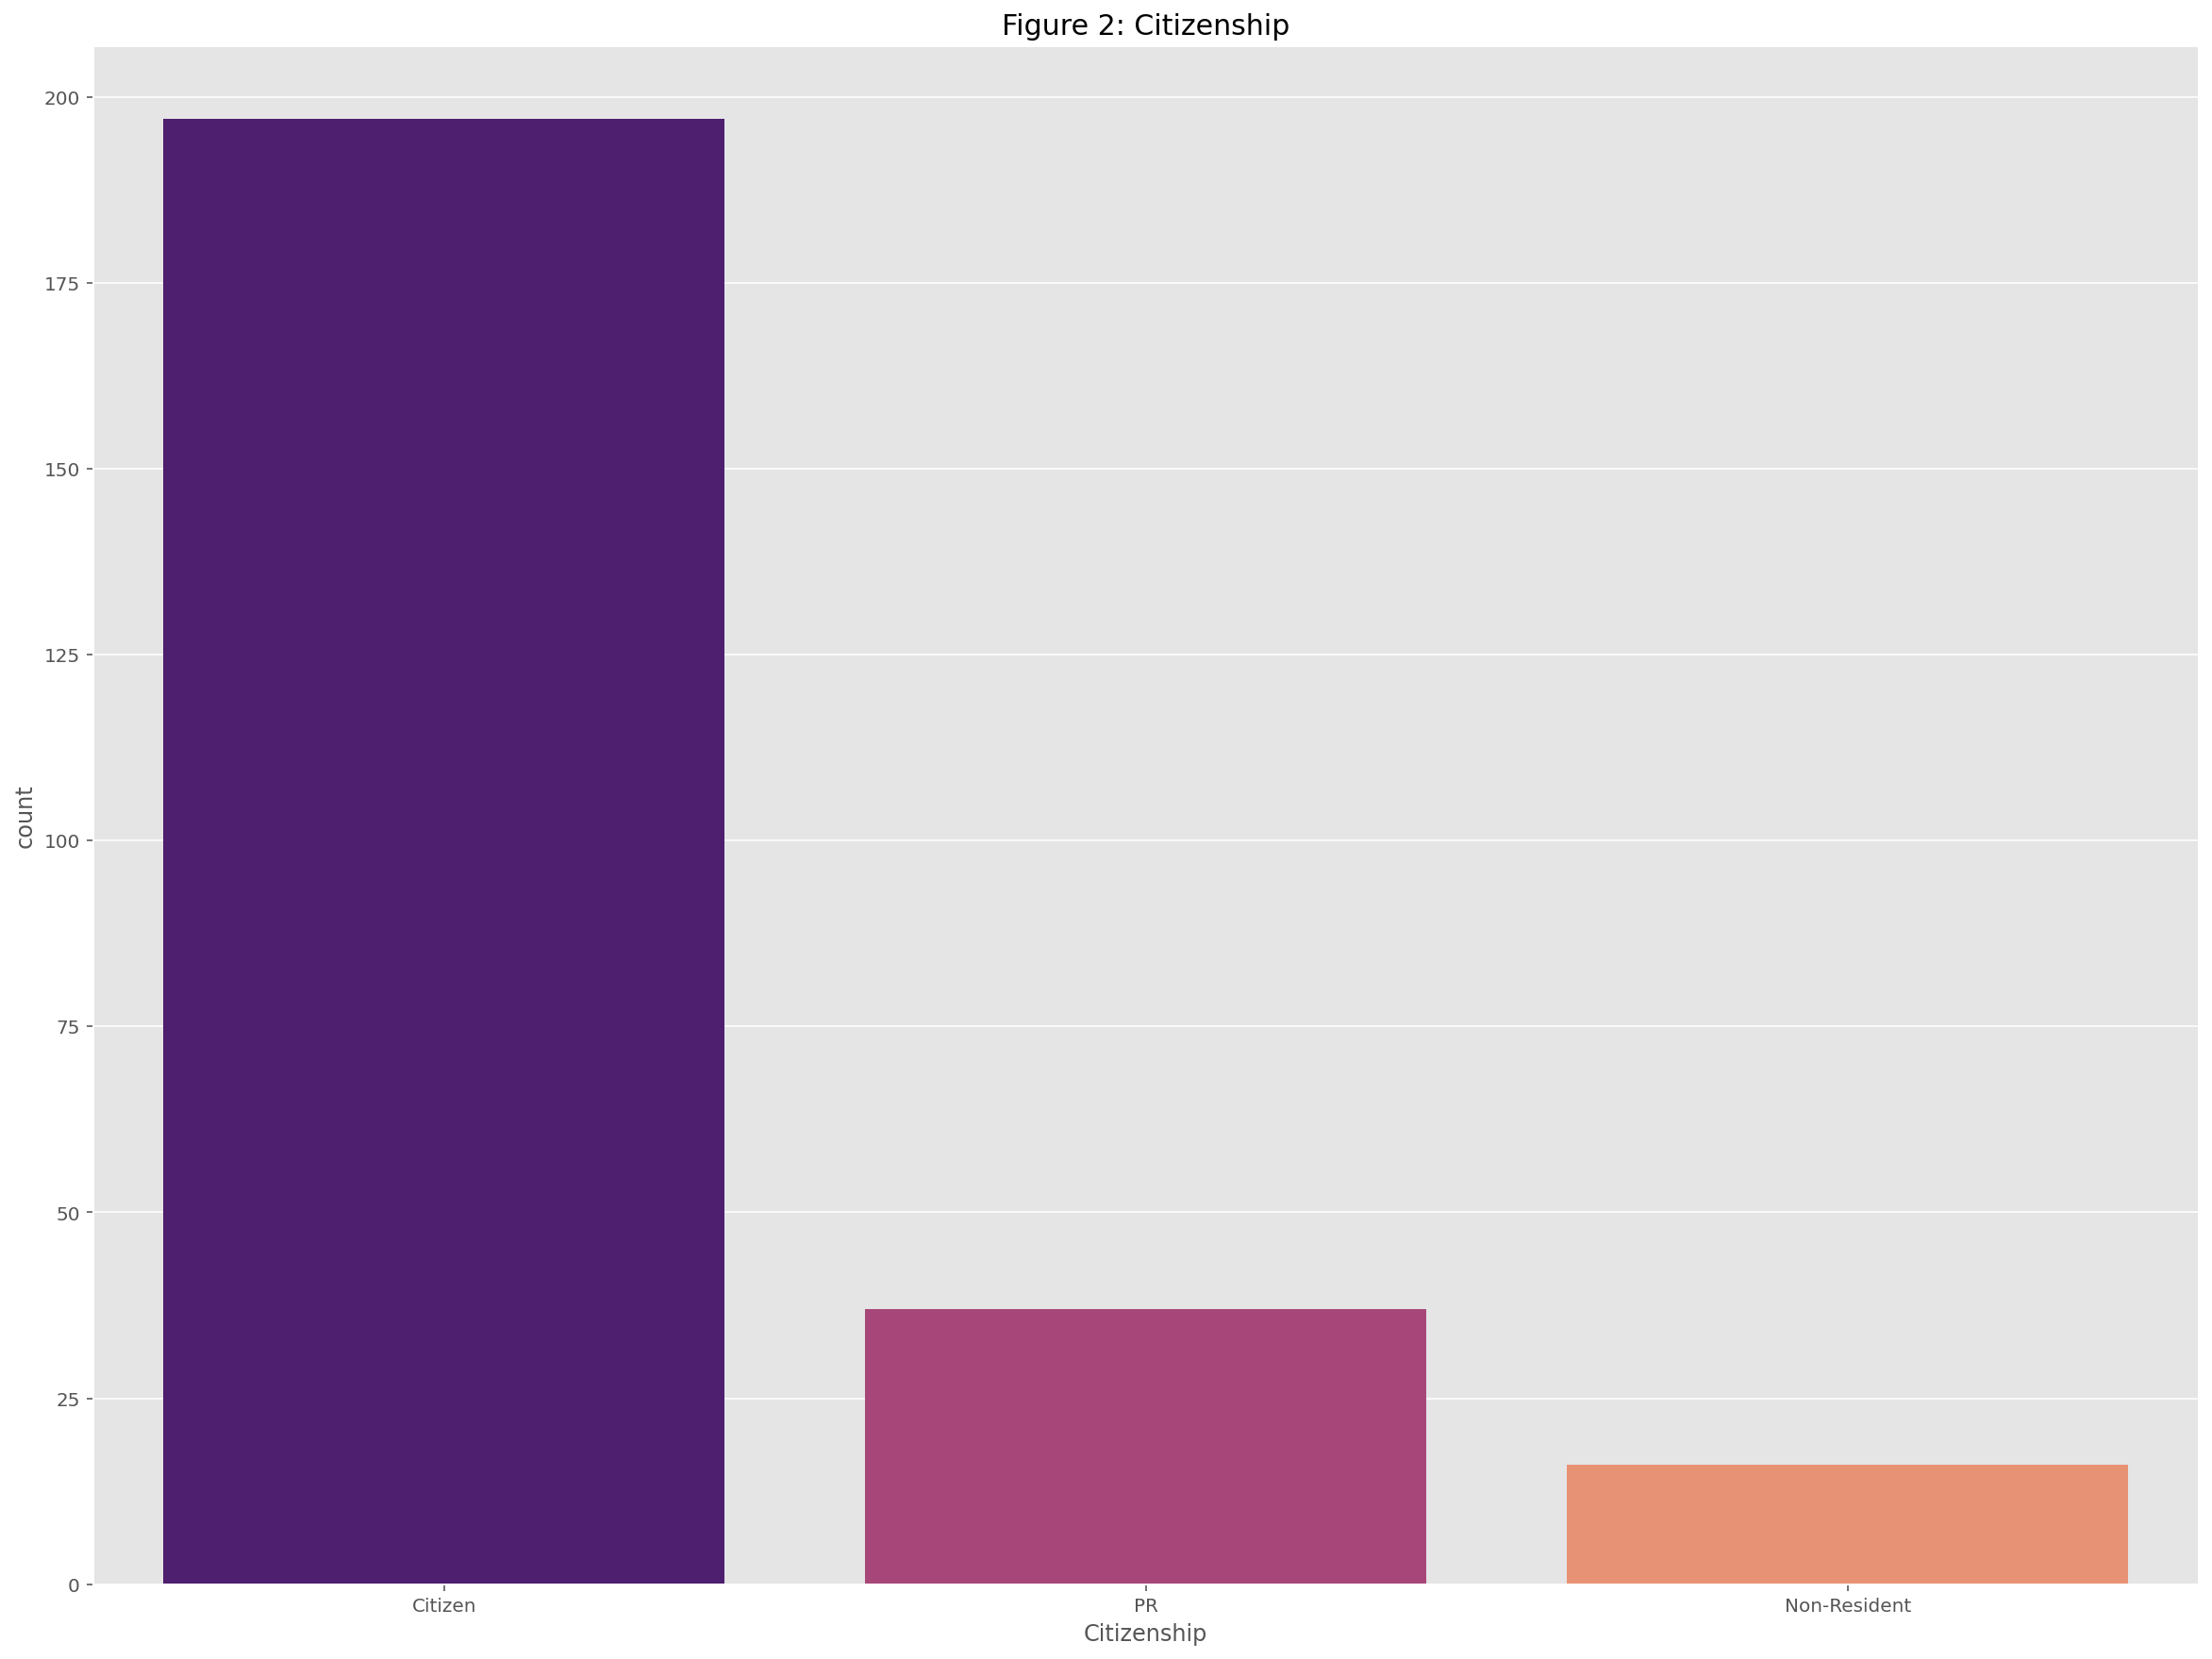

In [8]:
plt.figure(figsize = (20,15))
fig = sns.countplot(x = 'Citizenship', data = df, palette = 'magma', 
                    order = df['Citizenship'].value_counts().index)
fig = plt.title('Figure 2: Citizenship', fontsize = 15)
plt.show()

## 1c) Finding the length of service

In [9]:
df.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,1986-10-07,F,Single,Citizen,Yes,2012-04-02,2022-01-05,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,1986-05-25,F,Married,Citizen,No,2014-05-12,2022-01-05,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,1985-04-20,F,Single,Citizen,No,2014-09-29,2022-01-05,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,1984-06-10,M,Married,Citizen,No,2016-01-05,2022-01-05,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,1989-09-08,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,50825,Meet,5.0,4,2


In [10]:
df['ServiceDays'] = (df['LeftDate'] - df['JoinDate'])

In [11]:
df['ServiceYears'] = round(df['ServiceDays'] / np.timedelta64(1, 'Y'),1)

In [12]:
df.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence,ServiceDays,ServiceYears
0,1,Aairah Hastings,1986-10-07,F,Single,Citizen,Yes,2012-04-02,2022-01-05,Manufacturing,46335,Meet,3.4,5,15,3565 days,9.8
1,2,Aaminah Mcmillan,1986-05-25,F,Married,Citizen,No,2014-05-12,2022-01-05,Manufacturing,66825,Meet,4.6,3,20,2795 days,7.7
2,3,Aamna Howell,1985-04-20,F,Single,Citizen,No,2014-09-29,2022-01-05,Manufacturing,60446,Meet,3.4,4,14,2655 days,7.3
3,4,Aayan Ferrell,1984-06-10,M,Married,Citizen,No,2016-01-05,2022-01-05,Admin,93046,Meet,4.1,4,20,2192 days,6.0
4,5,Ace Potter,1989-09-08,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,50825,Meet,5.0,4,2,3345 days,9.2


#### Maximum number of years in service

In [13]:
df['ServiceYears'].max()

16.0

#### Minimum number of years in service

In [14]:
df['ServiceYears'].min()

0.1

#### Average number of years in service

In [15]:
round(df['ServiceYears'].mean(),1)

6.6

## 1d)interactive user input which allows the user to query if a particular person was/is a staff of the organization

In [ ]:
def check(name):
    if name == 'exit':
        return
    elif name in df['Staff'].unique():
        print('He/she is a staff.\n\nEnter name or "exit" to quit.')
        check(input())
    else:
        print('He/she is not a staff.\n\nEnter name or "exit" to quit.')
        check(input())

print('Enter name or "exit" to quit.')
name = input()
check(name)

Enter name or "exit" to quit.
Alena Galvan
He/she is a staff.

Enter name or "exit" to quit.
Alena
He/she is not a staff.

Enter name or "exit" to quit.
alena galvan
He/she is not a staff.

Enter name or "exit" to quit.
